In [19]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
from skimage.filters import gaussian
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

images_list_b = []
SIZE = 128

path = "/home/abbas/pict2/ben/*.*"

#First create a stack array of all images
for file in glob.glob(path):
    print(file)     #just stop here to see all file names printed
    img= cv2.imread(file,1)  #now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    img=img.flatten()
    images_list_b.append(img)
        
images_list_b = np.array(images_list_b)

# #Process each slice in the stack
# img_number = 1
# for image in range(images_list_b.shape[0]):
#     input_img = images_list_b[image,:,:]  #Grey images. For color add another dim.
#     smoothed_image = img_as_ubyte(gaussian(input_img, sigma=5, mode='constant', cval=0.0))
#     cv2.imwrite("test_images/smoothed/smoothed_image"+str(img_number)+".jpg", smoothed_image)
#     img_number +=1  



/home/abbas/pict2/ben/15.jpeg
/home/abbas/pict2/ben/8.jpeg
/home/abbas/pict2/ben/13.jpeg
/home/abbas/pict2/ben/19.jpeg
/home/abbas/pict2/ben/18.jpeg
/home/abbas/pict2/ben/14.jpeg
/home/abbas/pict2/ben/12.jpeg
/home/abbas/pict2/ben/4.jpeg
/home/abbas/pict2/ben/10.jpeg
/home/abbas/pict2/ben/20.jpeg
/home/abbas/pict2/ben/16.jpeg
/home/abbas/pict2/ben/5.jpeg
/home/abbas/pict2/ben/11.jpeg
/home/abbas/pict2/ben/2.jpeg
/home/abbas/pict2/ben/9.jpeg
/home/abbas/pict2/ben/6.jpeg
/home/abbas/pict2/ben/1.jpeg
/home/abbas/pict2/ben/17.jpeg
/home/abbas/pict2/ben/7.jpeg
/home/abbas/pict2/ben/3.jpeg


In [20]:
images_list_m = []
SIZE = 128

path = "/home/abbas/pict2/monica/*.*"

#First create a stack array of all images
for file in glob.glob(path):
    print(file)     #just stop here to see all file names printed
    img= cv2.imread(file,1)  #now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    img=img.flatten()
    images_list_m.append(img)
        
images_list_m = np.array(images_list_m)

# #Process each slice in the stack
# img_number = 1
# for image in range(images_list_m.shape[0]):
#     input_img = images_list_m[image,:,:]  #Grey images. For color add another dim.
#     smoothed_image = img_as_ubyte(gaussian(input_img, sigma=5, mode='constant', cval=0.0))
#     cv2.imwrite("test_images/smoothed/smoothed_image"+str(img_number)+".jpg", smoothed_image)
#     img_number +=1  





/home/abbas/pict2/monica/018.jpeg
/home/abbas/pict2/monica/012.jpeg
/home/abbas/pict2/monica/009.jpeg
/home/abbas/pict2/monica/017.jpeg
/home/abbas/pict2/monica/014.jpeg


In [21]:
y1=np.zeros(20)
y2=np.ones(5)

In [22]:
y=np.concatenate((y1,y2),axis=0)
y



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1.])

In [23]:
y.shape



(25,)

In [24]:
x1=images_list_b
x2=images_list_m



In [25]:
x=np.concatenate((x1,x2),axis=0)
x.shape


(25, 49152)

In [26]:

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 10,shuffle=True)

In [27]:
# 1. SVM

from sklearn.svm import SVC
svm = SVC(kernel = 'poly',degree=2,C=1,gamma='scale')

svm.fit(x_train,y_train)

from sklearn.metrics import accuracy_score

SVM_Score=accuracy_score(y_test,svm.predict(x_test))
SVM_Score

0.6

In [34]:
# 2. KNN

from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train,y_train)

KNN_Score=accuracy_score(y_test,KNN.predict(x_test))
KNN_Score

1.0

In [35]:
# 3. Logistic Regression

from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(x_train, y_train)

Logistic_Regression_Score=accuracy_score(y_test,Logistic_Regression.predict(x_test))
Logistic_Regression_Score

0.6

In [36]:
# 4. Decision Tree

from sklearn.tree import DecisionTreeClassifier
DTree=DecisionTreeClassifier()
DTree.fit(x_train , y_train)

DTree_Score=accuracy_score(y_test,DTree.predict(x_test))
DTree_Score

0.8

In [37]:
# 5. Random Forest

from sklearn.ensemble import RandomForestClassifier
Random_Forest=RandomForestClassifier()
Random_Forest.fit(x_train,y_train)

Random_Forest_Score=accuracy_score(y_test,Random_Forest.predict(x_test))
Random_Forest_Score

0.8

In [38]:
results=pd.DataFrame({
    "SVM": (SVM_Score*100),
    "Random Forest": (Random_Forest_Score*100),
    "KNN": (KNN_Score*100),
    "Decision Tree": (DTree_Score*100),
    "Logistic Regression": (Logistic_Regression_Score*100)
    
},index=['Score'])

results



,SVM,Random Forest,KNN,Decision Tree,Logistic Regression
Score,60.0,80.0,100.0,80.0,60.0


<AxesSubplot:>

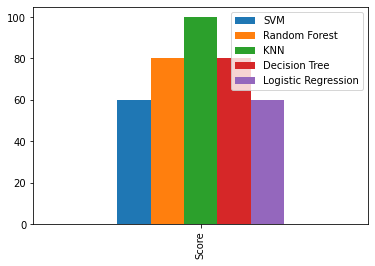

In [39]:
results.plot(kind='bar')